In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python-Statistical-Analysis/python_stat_sample-master/data/ch2_scores_em.csv', index_col='student number')

In [7]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores,
                          'mathematics': ma_scores},
                          index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                          'F', 'G', 'H', 'I', 'J'],
                                         name = 'student'))

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [11]:
# scores_df 데이터프레임을 복사하여 summary_df를 만듭니다.
summary_df = scores_df.copy()

# 'english' 열에서 영어 점수의 평균을 뺀 값을 'english_deviation' 열로 추가합니다.
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()

# 'mathematics' 열에서 수학 점수의 평균을 뺀 값을 'mathematics_deviation' 열로 추가합니다.
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()

# 'english_deviation' 열과 'mathematics_deviation' 열의 곱을 계산하여 'product of deviations' 열로 추가합니다.
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']

# 최종 결과를 출력합니다.
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [12]:
summary_df['product of deviations'].mean()

62.8

In [15]:
# en_scores와 ma_scores는 각각 영어 점수와 수학 점수를 담고 있는 배열입니다.

# ddof=0으로 설정하여 표본 표준 편차의 자유도 보정을 하지 않고, 모집단의 공분산을 계산합니다.
# 즉, 표본 대신 모집단의 공분산을 계산합니다.

cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

# cov_mat은 en_scores와 ma_scores 간의 공분산 행렬을 나타냅니다.

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [18]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [23]:
# np.var 함수를 사용하여 영어 점수(en_scores)와 수학 점수(ma_scores)의 분산을 계산합니다.
# ddof=0으로 설정하여 표본 분산의 자유도 보정을 하지 않고, 모집단의 분산을 계산합니다.

np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

# variance_en은 영어 점수(en_scores)의 분산을 나타냅니다.
# variance_ma는 수학 점수(ma_scores)의 분산을 나타냅니다.

(86.0, 68.44000000000001)

In [28]:
# numpy를 이용해 두 데이터 집합(en_scores와 ma_scores) 간의 공분산을 계산합니다.
# ddof=0는 표본의 크기로 나누어 불편 추정량이 아닌 표본 공분산을 구하겠다는 것을 의미합니다.
# 반환되는 행렬에서 [0,1] 위치는 en_scores와 ma_scores의 공분산 값을 나타냅니다.
# 이 공분산 값을 두 데이터 집합의 표준편차의 곱으로 나눔으로써,
# 두 변수 사이의 피어슨 상관 계수를 계산하려는 것으로 해석됩니다.

np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [30]:
# numpy의 corrcoef 함수를 사용하여 en_scores와 ma_scores의 피어슨 상관 계수를 계산합니다.
# 반환되는 행렬은 2x2 크기이며, [0,1] 및 [1,0] 위치의 값은 두 변수 사이의 상관 계수를 나타냅니다.
# [0,0] 위치는 en_scores의 자기 상관 계수(항상 1)이고, [1,1] 위치는 ma_scores의 자기 상관 계수(항상 1)입니다.
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [31]:
# pandas의 corr 메서드를 사용하여 scores_df 데이터프레임 내의 모든 변수(열) 간의 피어슨 상관 계수를 계산합니다.
# 반환되는 결과는 데이터프레임 형태로, 각 열의 조합에 따른 상관 계수를 포함하게 됩니다.
# 대각선 값들은 각 변수의 자기 상관 계수로, 모두 1의 값을 갖습니다.
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

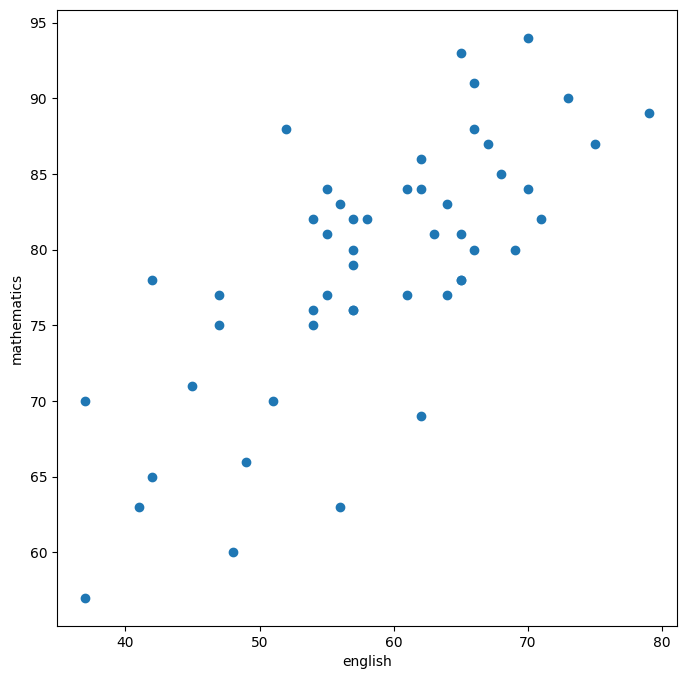

In [37]:
# pandas 데이터프레임 df에서 'english' 열의 데이터를 numpy 배열로 추출하여 english_scores에 저장합니다.
english_scores = np.array(df['english'])

# pandas 데이터프레임 df에서 'mathematics' 열의 데이터를 numpy 배열로 추출하여 math_scores에 저장합니다.
math_scores = np.array(df['mathematics'])

# 8x8 크기의 새로운 그림(figure) 객체를 생성합니다.
fig = plt.figure(figsize=(8, 8))

# 이 그림에 하위 그래프(subplot)를 추가합니다. 111은 1x1 그리드의 첫 번째 위치를 의미합니다.
ax = fig.add_subplot(111)

# english_scores와 math_scores를 사용하여 산점도를 그립니다.
ax.scatter(english_scores, math_scores)

# x축의 라벨을 'english'로 설정합니다.
ax.set_xlabel('english')

# y축의 라벨을 'mathematics'로 설정합니다.
ax.set_ylabel('mathematics')

# 그림을 화면에 표시합니다.
plt.show()

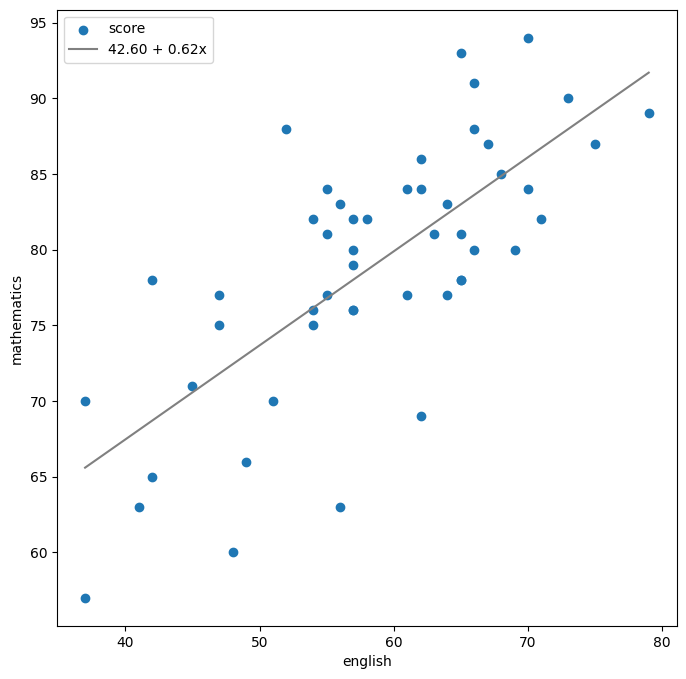

In [44]:
# english_scores와 math_scores는 데이터로 가정합니다.
# 이 두 변수 간의 선형 관계를 분석하고 시각화할 것입니다.

# np.polyfit 함수를 사용하여 1차 다항식(선형 관계)의 계수를 계산합니다.
poly_fit = np.polyfit(english_scores, math_scores, 1)

# poly_fit 배열의 첫 번째 값은 기울기(coefficient of x)이고 두 번째 값은 y절편(intercept)입니다.

# 계수 배열 poly_fit를 이용하여 1차 다항식 객체를 생성합니다.
poly_1d = np.poly1d(poly_fit)

# english_scores의 최소값과 최대값 사이의 일정 간격으로 값을 갖는 배열을 생성합니다.
# 이 배열은 후에 선형 회귀선을 그릴 때 x 값으로 사용됩니다.
xs = np.linspace(english_scores.min(), english_scores.max())

# xs의 각 값에 대해 선형 회귀선의 y 값을 계산합니다.
ys = poly_1d(xs)

# 8x8 크기의 새로운 그림(figure) 객체를 생성합니다.
fig = plt.figure(figsize=(8, 8))

# 그림 객체에 서브플롯(subplot)을 추가합니다.
ax = fig.add_subplot(111)

# english_scores와 math_scores를 사용하여 산점도를 그립니다.
ax.scatter(english_scores, math_scores, label='score')

# xs와 ys를 사용하여 선형 회귀선을 그립니다.
# 회귀선의 라벨은 선의 방정식을 나타내며, 계수는 소수점 둘째 자리까지 표시됩니다.
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')

# x축의 라벨을 'english'로 설정합니다.
ax.set_xlabel('english')

# y축의 라벨을 'mathematics'로 설정합니다.
ax.set_ylabel('mathematics')

# 그래프의 범례를 표시합니다. 'upper left' 위치에 표시됩니다.
ax.legend(loc='upper left')

# 그림을 화면에 표시합니다.
plt.show()


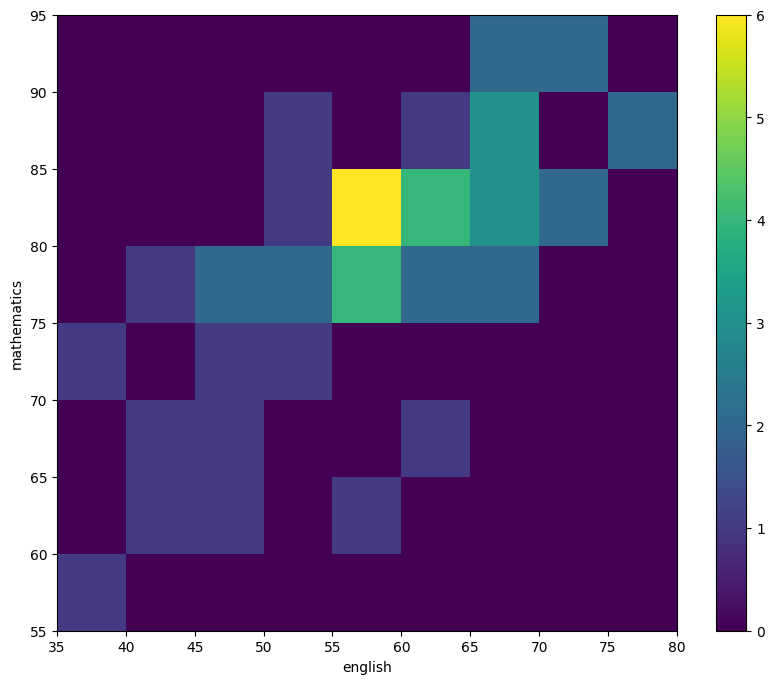

In [43]:
# 10x8 크기의 새로운 그림(figure) 객체를 생성합니다.
fig = plt.figure(figsize=(10, 8))

# 그림 내에 하위 그래프(subplot)를 추가합니다. 111은 1x1 그리드의 첫 번째 위치를 의미합니다.
ax = fig.add_subplot(111)

# ax의 hist2d 메서드를 사용하여 2차원 히스토그램을 생성합니다.
# english_scores는 x축 데이터, math_scores는 y축 데이터로 사용됩니다.
# bins는 각 축에 대한 빈(bin)의 개수를 지정하며, 여기서는 x축에 9개, y축에 8개의 빈을 사용합니다.
# range는 히스토그램을 그릴 데이터의 범위를 지정합니다. x축은 35부터 80, y축은 55부터 95 범위로 지정됩니다.
c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])

# x축의 라벨을 'english'로 설정합니다.
ax.set_xlabel('english')

# y축의 라벨을 'mathematics'로 설정합니다.
ax.set_ylabel('mathematics')

# x축의 눈금 위치를 hist2d에서 생성된 빈의 경계로 설정합니다.
ax.set_xticks(c[1])

# y축의 눈금 위치를 hist2d에서 생성된 빈의 경계로 설정합니다.
ax.set_yticks(c[2])

# 그래프에 colorbar를 추가합니다. 이 colorbar는 2차원 히스토그램의 농도(데이터의 개수)를 나타냅니다.
# c[3]는 hist2d에서 반환된 QuadMesh 객체로, 각 빈의 농도 정보를 포함하고 있습니다.
fig.colorbar(c[3], ax=ax)

# 그림을 화면에 표시합니다.
plt.show()

In [50]:
# '/content/drive/MyDrive/Python-Statistical-Analysis/python_stat_sample-master/data/ch3_anscombe.npy' 경로에 있는 데이터를 로드합니다.
anscombe_data = np.load('/content/drive/MyDrive/Python-Statistical-Analysis/python_stat_sample-master/data/ch3_anscombe.npy')

# 데이터의 모양(shape)을 출력합니다.
print(anscombe_data.shape)

# 데이터의 첫 번째 요소를 출력합니다.
first_data_point = anscombe_data[0]

# 데이터의 첫 번째 요소를 출력하여 데이터 구조를 살펴봅니다.
# anscombe_data는 배열이며, 첫 번째 요소를 출력하면 해당 요소의 내용을 확인할 수 있습니다.
print(first_data_point)

(4, 11, 2)
[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [51]:
# 데이터 프레임을 생성하고 열 이름(index)을 설정합니다.
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation', 'X&Y_regression line'])

# Anscombe의 데이터 집합에 대한 통계 정보를 계산하고 데이터 프레임에 저장합니다.
for i, data in enumerate(anscombe_data):
    # 데이터에서 X와 Y 변수를 추출합니다.
    dataX = data[:, 0]
    dataY = data[:, 1]

    # X와 Y 변수에 대한 선형 회귀 모델을 생성합니다.
    poly_fit = np.polyfit(dataX, dataY, 1)

    # 각 통계 정보를 계산하고 데이터 프레임에 열을 추가합니다.
    stats_df[f'data{i+1}'] = [
        f'{np.mean(dataX):.2f}',             # X 평균
        f'{np.var(dataX):.2f}',              # X 분산
        f'{np.mean(dataY):.2f}',             # Y 평균
        f'{np.var(dataY):.2f}',              # Y 분산
        f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',  # X와 Y의 상관관계
        f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x'  # X와 Y의 회귀선 방정식
    ]

# 통계 정보가 추가된 데이터 프레임을 출력합니다.
print(stats_df)

                            data1         data2         data3         data4
X_mean                       9.00          9.00          9.00          9.00
X_variance                  10.00         10.00         10.00         10.00
Y_mean                       7.50          7.50          7.50          7.50
Y_variance                   3.75          3.75          3.75          3.75
X&Y_correlation              0.82          0.82          0.82          0.82
X&Y_regression line  3.00 + 0.50x  3.00 + 0.50x  3.00 + 0.50x  3.00 + 0.50x


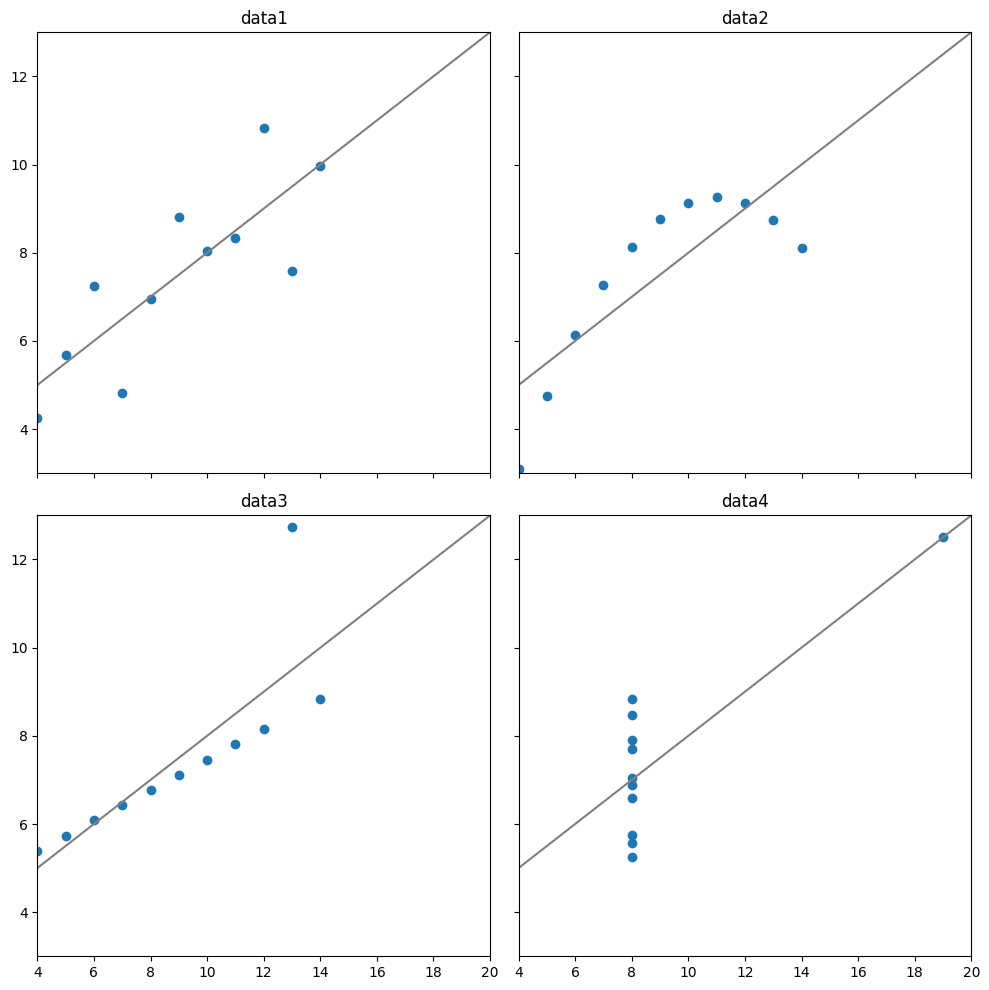

In [55]:
# 2x2 서브플롯(subplot)을 생성하고 공유 X 및 Y 축을 설정합니다.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

# xs 범위를 설정합니다.
xs = np.linspace(0, 30, 100)

# Anscombe의 데이터 집합을 반복하면서 각 데이터 세트에 대한 작업을 수행합니다.
for i, data in enumerate(anscombe_data):
    # 데이터에 대한 선형 회귀 모델을 생성합니다.
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)

    # 현재 서브플롯을 설정합니다.
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    ax.set_title(f'data{i+1}')

    # 산점도를 그리고 선형 회귀선을 추가합니다.
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 서브플롯 레이아웃을 조정하고 그래프를 출력합니다.
plt.tight_layout()
plt.show()